In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            f1_score, confusion_matrix, classification_report,
                            roc_curve, roc_auc_score, precision_recall_curve, 
                            average_precision_score)
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('diabetes.csv')
print("\nПервые 5 строк датасета:")
print(df.head())

print("\nИнформация о датасете:")
print(df.info())

print("\nСтатистическое описание данных:")
print(df.describe())


Первые 5 строк датасета:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-

In [14]:
print("\nПроверка на пропущенные значения:")
print(df.isnull().sum())

print("\nРаспределение целевой переменной (Outcome):")
print(df['Outcome'].value_counts())
print("\nДоля положительных случаев (диабет): {:.2f}%".format(df['Outcome'].mean()*100))


Проверка на пропущенные значения:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Распределение целевой переменной (Outcome):
Outcome
0    500
1    268
Name: count, dtype: int64

Доля положительных случаев (диабет): 34.90%


In [15]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nРазмеры выборок:")
print(f"Обучающая выборка: {X_train.shape[0]} записей")
print(f"Тестовая выборка: {X_test.shape[0]} записей")


Размеры выборок:
Обучающая выборка: 537 записей
Тестовая выборка: 231 записей


In [16]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(f"\nРезультаты для модели {model_name}:")
    print("Accuracy: {:.3f}".format(accuracy))
    print("Precision: {:.3f}".format(precision))
    print("Recall: {:.3f}".format(recall))
    print("F1-score: {:.3f}".format(f1))
    print("\nМатрица ошибок:")
    print(conf_matrix)
    print("\nОтчет о классификации:")
    print(classification_report(y_test, y_pred))
    
    if y_pred_proba is not None:
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        pr_auc = average_precision_score(y_test, y_pred_proba)
        print("ROC-AUC: {:.3f}".format(roc_auc))
        print("PR-AUC: {:.3f}".format(pr_auc))
    
    return {
        'model': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc if y_pred_proba is not None else None,
        'pr_auc': pr_auc if y_pred_proba is not None else None
    }

# Сравнение моделей
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg_metrics = evaluate_model(log_reg, X_train_scaled, X_test_scaled, y_train, y_test, "Логистическая регрессия")


Результаты для модели Логистическая регрессия:
Accuracy: 0.745
Precision: 0.677
Recall: 0.519
F1-score: 0.587

Матрица ошибок:
[[130  20]
 [ 39  42]]

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       150
           1       0.68      0.52      0.59        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.74      0.74      0.74       231

ROC-AUC: 0.838
PR-AUC: 0.733



Результаты для модели Решающее дерево:
Accuracy: 0.762
Precision: 0.703
Recall: 0.556
F1-score: 0.621

Матрица ошибок:
[[131  19]
 [ 36  45]]

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.78      0.87      0.83       150
           1       0.70      0.56      0.62        81

    accuracy                           0.76       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.76      0.76      0.75       231

ROC-AUC: 0.714
PR-AUC: 0.546


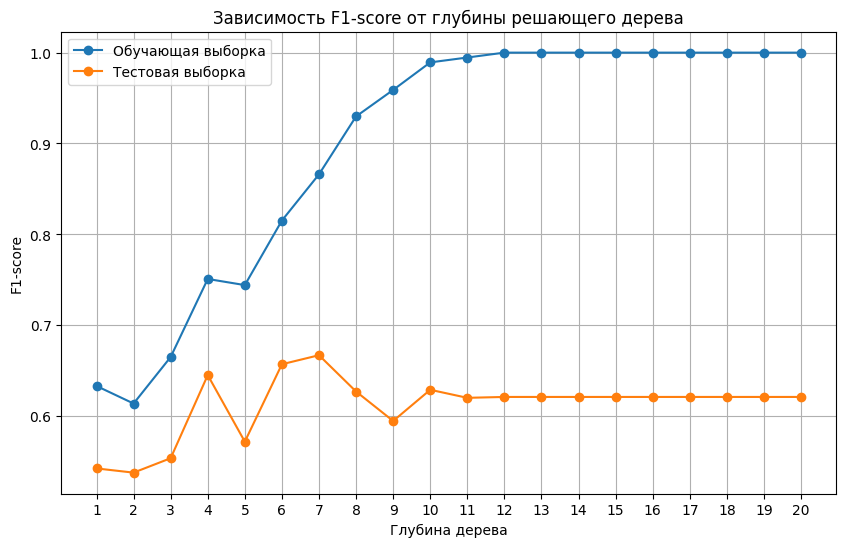

In [17]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_metrics = evaluate_model(tree_clf, X_train, X_test, y_train, y_test, "Решающее дерево")

# Исследование зависимости F1-score от глубины дерева
max_depths = range(1, 21)
train_scores = []
test_scores = []

for depth in max_depths:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)
    
    y_train_pred = tree.predict(X_train)
    train_f1 = f1_score(y_train, y_train_pred)
    train_scores.append(train_f1)
    
    y_test_pred = tree.predict(X_test)
    test_f1 = f1_score(y_test, y_test_pred)
    test_scores.append(test_f1)

# Построение графика зависимости F1-score от глубины дерева
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_scores, 'o-', label='Обучающая выборка')
plt.plot(max_depths, test_scores, 'o-', label='Тестовая выборка')
plt.xlabel('Глубина дерева')
plt.ylabel('F1-score')
plt.title('Зависимость F1-score от глубины решающего дерева')
plt.xticks(max_depths)
plt.grid(True)
plt.legend()
plt.show()

Мы видим что лучший результат решающего дерева достигается на 7 глубине. При сравнении Решающего дерева и Логистической регресии по параметру F1-score можно сделать вывод что решающее дерево с 7 глубиной справляется лучше.



Оптимальная глубина дерева: 7 (F1-score = 0.667)


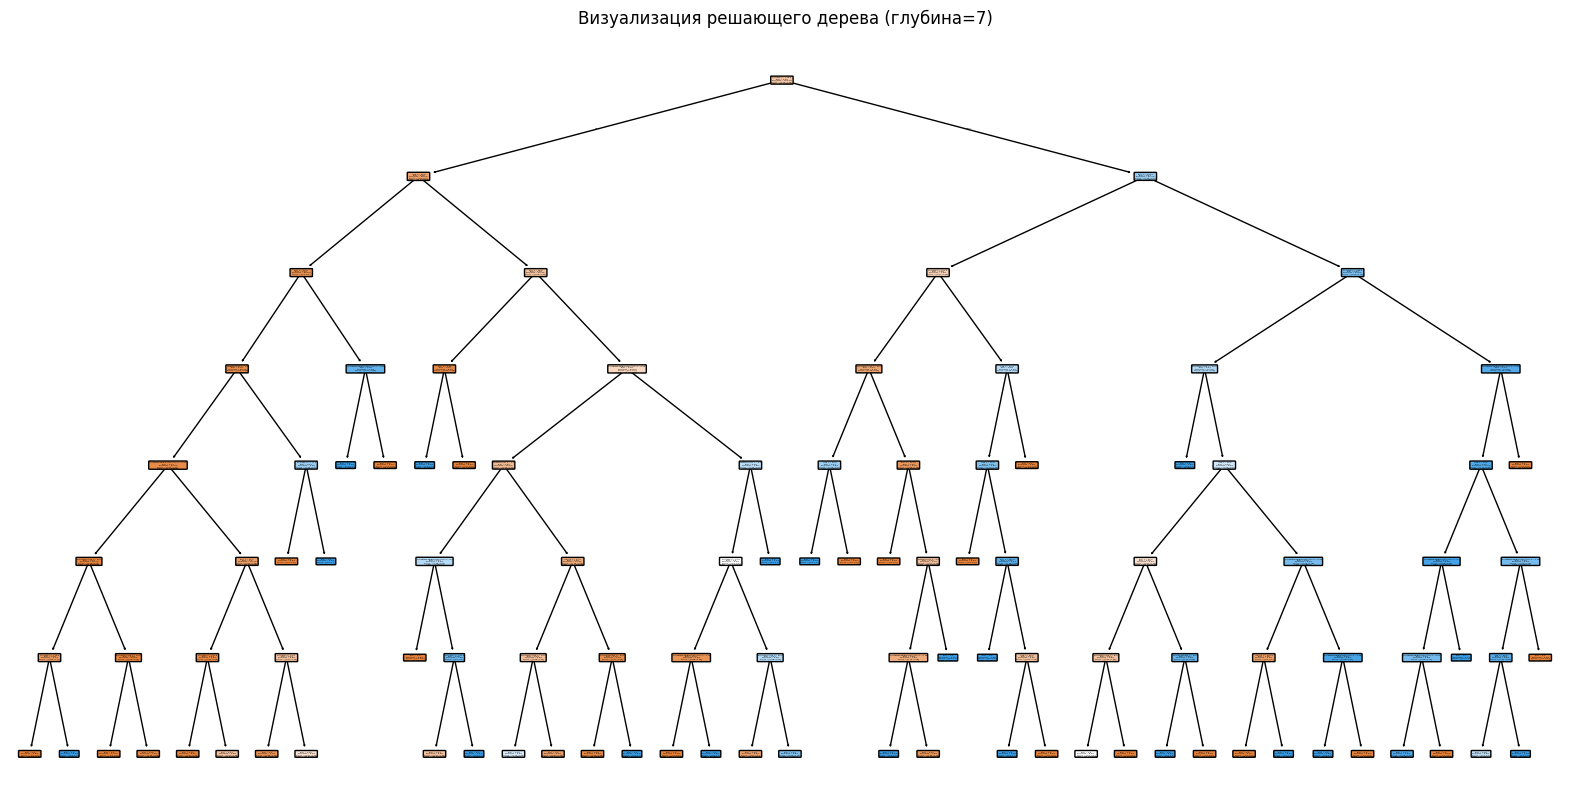

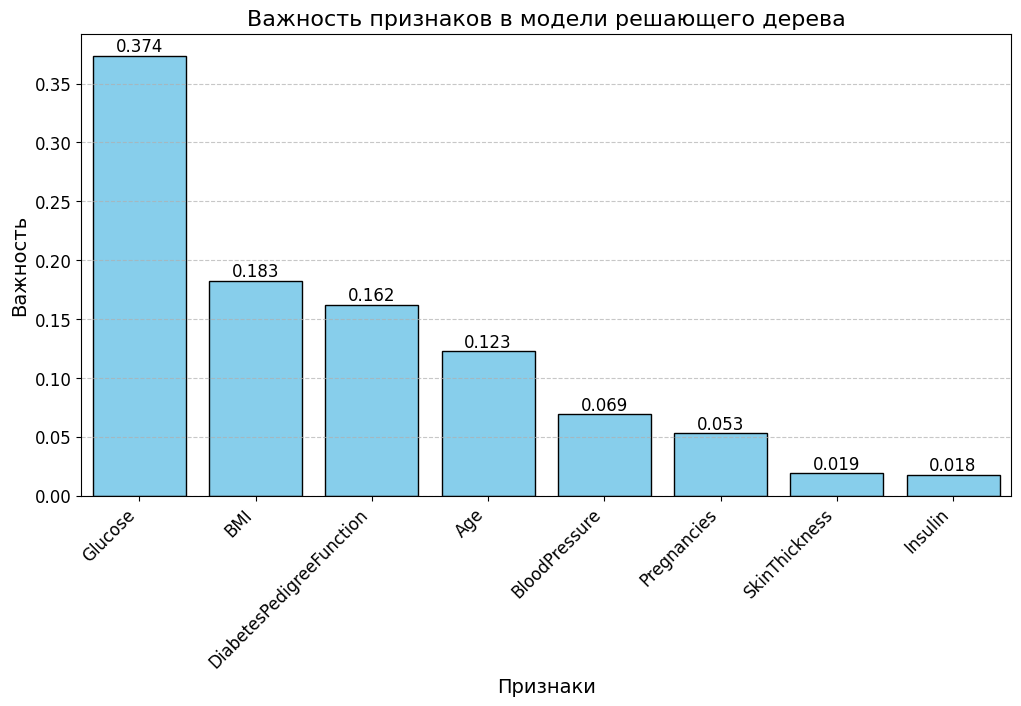

In [23]:
optimal_depth = max_depths[np.argmax(test_scores)]
print(f"\nОптимальная глубина дерева: {optimal_depth} (F1-score = {max(test_scores):.3f})")

# Обучение и оценка модели с оптимальной глубиной
optimal_tree = DecisionTreeClassifier(max_depth=optimal_depth, random_state=42)
optimal_tree.fit(X_train, y_train)
plt.figure(figsize=(20, 10))
plot_tree(optimal_tree, 
          filled=True, 
          feature_names=X.columns, 
          class_names=['No Diabetes', 'Diabetes'], 
          rounded=True, 
          proportion=True,
          precision=2)
plt.title("Визуализация решающего дерева (глубина={})".format(optimal_depth))
plt.show()

# Улучшенная визуализация важности признаков
importances = optimal_tree.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Важность признаков в модели решающего дерева', fontsize=16)
bars = plt.bar(range(X.shape[1]), importances[indices], color='skyblue', edgecolor='black')

# Добавляем значения важности на столбцы
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             '{:.3f}'.format(height),
             ha='center', va='bottom', fontsize=12)

plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Признаки', fontsize=14)
plt.ylabel('Важность', fontsize=14)
plt.xlim([-0.5, X.shape[1]-0.5])
plt.grid(axis='y', linestyle='--', alpha=0.7)

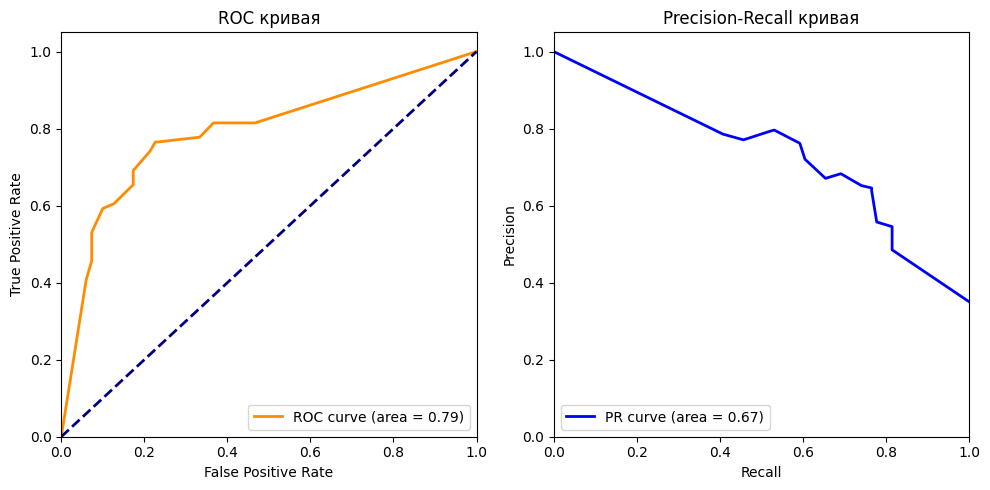

In [24]:
# ROC и PR кривые
y_pred_proba = optimal_tree.predict_proba(X_test)[:, 1]

# ROC кривая
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC кривая')
plt.legend(loc="lower right")

# PR кривая
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = average_precision_score(y_test, y_pred_proba)

plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall кривая')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

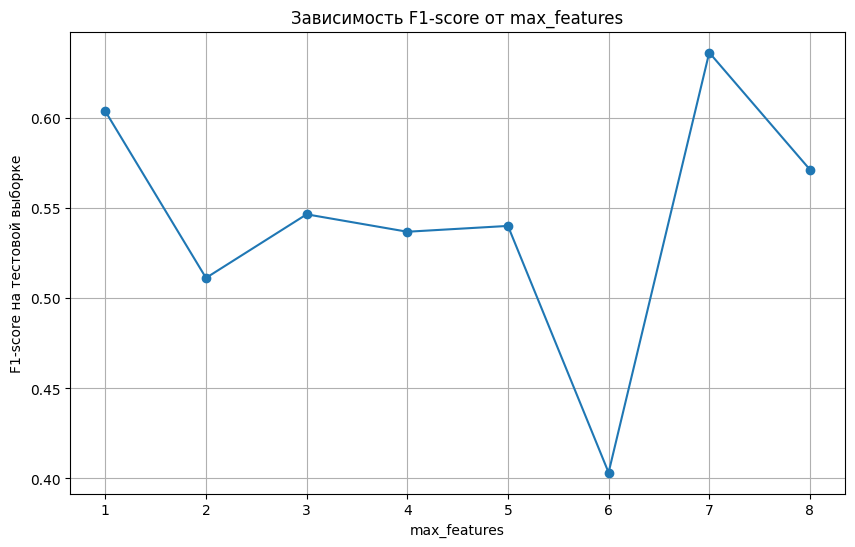

In [21]:
max_features_options = range(1, X.shape[1]+1)
test_scores_features = []

for n_features in max_features_options:
    tree = DecisionTreeClassifier(max_depth=optimal_depth, 
                                max_features=n_features, 
                                random_state=42)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    test_scores_features.append(f1_score(y_test, y_pred))

# График зависимости F1-score от max_features
plt.figure(figsize=(10, 6))
plt.plot(max_features_options, test_scores_features, 'o-')
plt.xlabel('max_features')
plt.ylabel('F1-score на тестовой выборке')
plt.title('Зависимость F1-score от max_features')
plt.xticks(max_features_options)
plt.grid(True)
plt.show()

In [11]:
optimal_n_features = max_features_options[np.argmax(test_scores_features)]
print(f"\nОптимальное количество признаков для рассмотрения: {optimal_n_features} (F1-score = {max(test_scores_features):.3f})")

# Финальная модель
final_tree = DecisionTreeClassifier(max_depth=optimal_depth, 
                                 max_features=optimal_n_features,
                                 random_state=42)
final_tree.fit(X_train, y_train)

final_metrics = evaluate_model(final_tree, X_train, X_test, y_train, y_test, 
                             "Оптимальное решающее дерево")

# Сравнение всех моделей
all_metrics = pd.DataFrame([log_reg_metrics, tree_metrics, optimal_metrics, final_metrics])
print("\nСравнение всех моделей:")
print(all_metrics)


Оптимальное количество признаков для рассмотрения: 8 (F1-score = 0.667)

Результаты для модели Оптимальное решающее дерево:
Accuracy: 0.792
Precision: 0.762
Recall: 0.593
F1-score: 0.667

Матрица ошибок:
[[135  15]
 [ 33  48]]

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       150
           1       0.76      0.59      0.67        81

    accuracy                           0.79       231
   macro avg       0.78      0.75      0.76       231
weighted avg       0.79      0.79      0.79       231

ROC-AUC: 0.791
PR-AUC: 0.671

Сравнение всех моделей:
                         model  accuracy  precision    recall        f1  \
0      Логистическая регрессия  0.744589   0.677419  0.518519  0.587413   
1              Решающее дерево  0.761905   0.703125  0.555556  0.620690   
2  Решающее дерево (глубина=7)  0.792208   0.761905  0.592593  0.666667   
3  Оптимальное решающее дерево  0.792208   0.761905  0.592593  0.66